In [1]:
from matplotlib import rc
rc('animation', html = 'jshtml')
import math
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import animation
%matplotlib inline

In [2]:
#initialize the values
L = 1
N = 100
c = 1 
tmax = 1
dx = L/N
dt =0.001
M = 1000

X= [dx * i for i in range(N+1)]

A)

In [4]:
def update_string(Y, Y_prev):
    '''
    This function generates the follown values of the amplitude of the wave depending on the two previous values. 
    ARGD:
      -Y, the current configuration of the amplitudes
      -Y_prec, the previous configuration of the amplitudes
    Out:
      -Y_next, the next configuration of the amplitudes
    '''
    Y_next = []
    for i in range(len(Y)-1):
        y = c**2 * ((dt)**2 / (dx)**2) * (Y[i+1] + Y[i-1] - 2*Y[i])- Y_prev[i] + 2*Y[i]
        Y_next.append(y)
    Y_next.append(0)
    Y_next[0] = 0
    return(Y_next)

B)

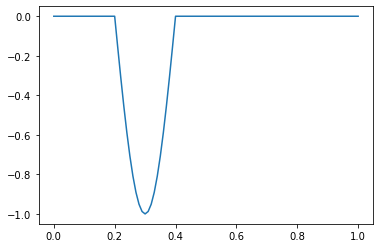

In [5]:
def init_string(X, case = 0):
    ''''
    Initialize a wave on a string, bependent on the case a different wave gets initialized
    Args:
        -X, the range for which to generate the wave values
        -case, an indicator to use a specific wave function
    Out: the initial state of the string
    '''
    
    Y = []
    if case == 0:
        for x in X:
            y = math.sin(2 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 1:
        for x in X:
            y = math.sin(5 *np.pi* x)
            Y.append(y)
        Y[0] = 0
        Y[-1] = 0
    if case == 2:
            for x in X:
                if x > (1/5) and x< (2/5):
                    y = math.sin(5 *np.pi* x)
                else:
                    y = 0
                Y.append(y)
    return(Y)

Y = init_string(X,2)
plt.plot(X,Y)
plt.show()

In [6]:
def plot_wave(X, c):
    '''
    plot a wave function at different time steps
    ARG: 
        - X, the range for which the generate the wave
        - c, the case which determines which wave gets initialized
    '''
    Y = init_string(X, c)
    Y_prev = np.copy(Y)
    for t in range(1000):
        Y_new = update_string(Y, Y_prev)
        if t%150 == 0:
            Time = round(0.001 * t, 2)
            plt.plot(X, Y_new, label = "t = {}".format(Time))
        Y_prev = Y
        Y = Y_new
    plt.legend()
    plt.show()

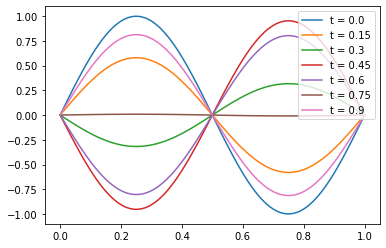

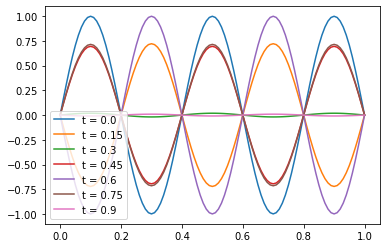

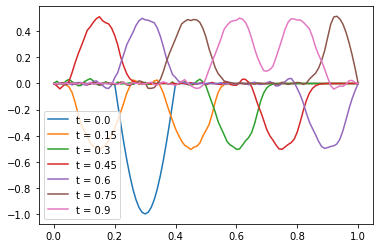

In [8]:
for i in range(3):
    plot_wave(X,i)

MovieWriter ffmpeg unavailable; trying to use pillow instead.


TypeError: 'str' object is not callable

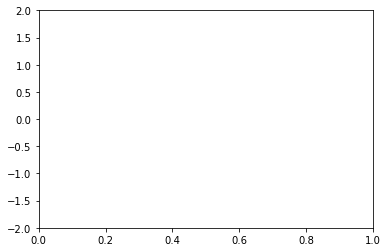

In [13]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def frame_matrix(M, X, c):
    '''
    generate a matrix containing all frames for a specific wave function
    - M, number of frames
    - X, the range for which the generate the wave
    - c, the case which determines which wave gets initialized
    '''
    Matrix= np.zeros((M,len(X)))
    Y = init_string(X, c)
    Y_prev = np.copy(Y)
    Matrix[0] = Y
    for t in range(1,M):
        Y_new = update_string(Y, Y_prev)
        Y_prev = Y
        Y = Y_new
        Matrix[t] = Y
    return Matrix

frames = frame_matrix(1000, X, 0)

def init():
    '''
    initialization function: plot the background of each frame
    '''
    line.set_data([], [])
    return line,

def animate(i):
    '''
    animation function.  This is called sequentially
    '''
    x = np.linspace(0, L, N+1)
    y = frames[i]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=M, interval=20, blit=False)

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [ ]:
anim

In [ ]:
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
